# O seguinte projeto tem o objetivo de investigar a probabilidade de prever corretamente o tipo de câncer de mama (maligno ou benigno) dado as características da massa da mama calculada a partir de imagens digitalizadas. As características descrevem o núcleo da célula presente na massa da mama.

## Informação das características:

###     Característica                     Domínio
   -- -----------------------------------------
###   1. Sample code number            id number
###   2. Clump Thickness               1 - 10
###   3. Uniformity of Cell Size       1 - 10
###   4. Uniformity of Cell Shape      1 - 10
###   5. Marginal Adhesion             1 - 10
###   6. Single Epithelial Cell Size   1 - 10
###   7. Bare Nuclei                   1 - 10
###   8. Bland Chromatin               1 - 10
###   9. Normal Nucleoli               1 - 10
### 10. Mitoses                       1 - 10
###  11. Class:                        (2 for benign, 4 for malignant)

In [1]:
import os
import sys
import time
import datetime
import numpy as np
import pandas as pd
import pathlib
import csv

In [2]:
datapath = pathlib.Path("../Data Science/")
outputs = pathlib.Path("../outputs/")
csvfile = "breastcancerdata.csv"
datafile = datapath / csvfile

### Analisando os dados da maneira que foram capturados.

In [3]:
df = pd.read_csv(datafile)
df.head()
#df.info()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
df.shape

(698, 11)

### Inserindo o nome de cada característica nas colunas.

In [5]:
df.columns = ['Id', 'Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

### Removendo a coluna Id pois não agrega muita informação para a análise.

In [6]:
df2 = df[['Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']]

In [7]:
df2.head()

,Thickness,UniofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [26]:
df2.dtypes

Thickness                    int64
UniofCellSize                int64
UniformityofCellShape        int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
Bland Chromatin              int64
Normal Nucleoli              int64
Mitoses                      int64
Class                        int64
dtype: object

### O feature BareNuclei é um object o que não faz muito sentido pois deve ser um valor entre 1 e 10, ou seja, int. Vamos analisar.

In [29]:
df2.BareNuclei.unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

### Temos um '?', que segundo a descrição dos dados oferecida pelo UCI significa 'NaN'.

In [58]:
#df2.BareNuclei = df2.BareNuclei.str.replace('?', '')
#df2['BareNuclei'] = df2['BareNuclei'].astype(int)
#df2.BareNuclei.unique()

In [61]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 697
Data columns (total 10 columns):
Thickness                   698 non-null int64
UniofCellSize               698 non-null int64
UniformityofCellShape       698 non-null int64
MarginalAdhesion            698 non-null int64
SingleEpithelialCellSize    698 non-null int64
BareNuclei                  698 non-null object
Bland Chromatin             698 non-null int64
Normal Nucleoli             698 non-null int64
Mitoses                     698 non-null int64
Class                       698 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.0+ KB


In [14]:
#Número de casos malignos
maligno = len(df2[df2['Class']==4])

#Número de casos benignos
benigno = len(df2[df2['Class']==2])

#Taxa de tumores malignos
taxa = str((float(maligno)/(len(df2)))*100)

print(u'Numero de casos de tumores malignos: ' , maligno)
print(u'Número de casos de tumores benignos: ' , benigno)
print(u'Taxa de tumores malignos: ' + taxa + '%')

Numero de casos de tumores malignos:  241
Número de casos de tumores benignos:  457
Taxa de tumores malignos: 34.52722063037249%


### Vamos plotar as relações entre os features.

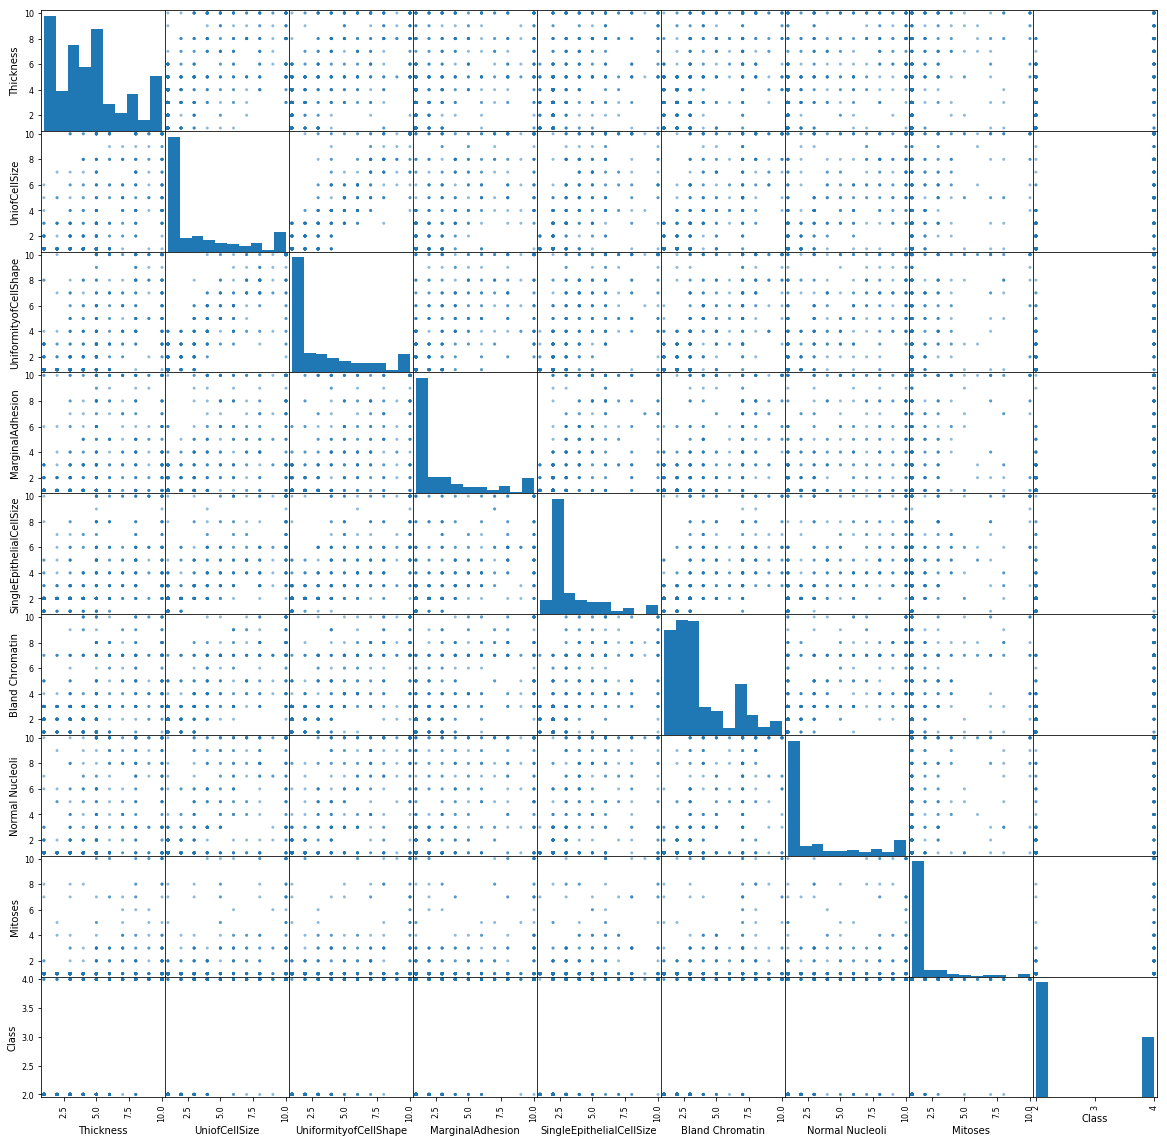

In [65]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df2, figsize=(20,20))
plt.show()

# Usando alguns modelos no dado.
## Vamos usar regressão logística pois é o mais apropriado para casos de classificação.

In [80]:
y = df.Class
X = df2[['Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion',
         'SingleEpithelialCellSize', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']] # 'BareNuclei',

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(488, 8) (488,)
(210, 8) (210,)


In [83]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()

In [84]:
model = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

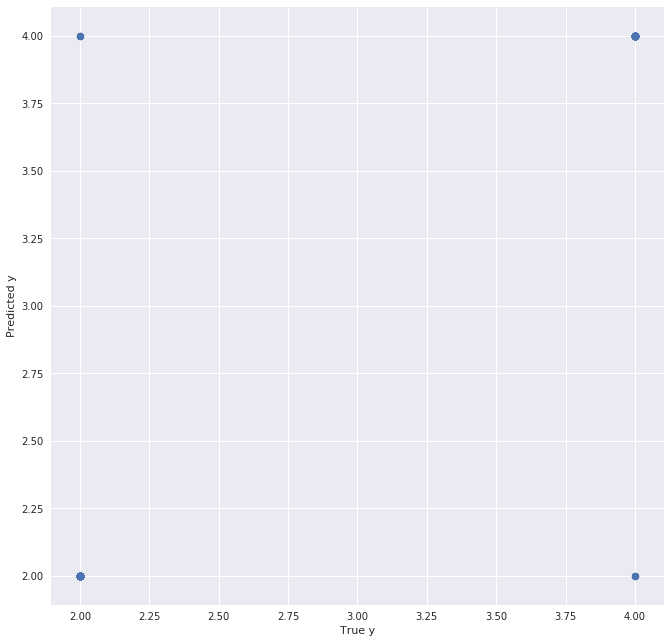

In [85]:
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()

# Árvore de decisão

In [86]:
import codecs
import scipy.stats as ss
import scipy.signal as signal
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image #needed to render in notebook
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import pylab as pl

In [87]:
features = set(df2[['Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion',
         'SingleEpithelialCellSize', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']])

In [88]:
for feature in features:
    print(u'Feature {} has unique values: {}'.format(feature, df2[feature].unique()))
    print(u'Quantidade de features:', len(features))

Feature Thickness has unique values: [ 5  3  6  4  8  1  2  7 10  9]
Quantidade de features: 8
Feature MarginalAdhesion has unique values: [ 5  1  3  8 10  4  6  2  9  7]
Quantidade de features: 8
Feature UniformityofCellShape has unique values: [ 4  1  8 10  2  3  5  6  7  9]
Quantidade de features: 8
Feature Mitoses has unique values: [ 1  5  4  2  3  7 10  8  6]
Quantidade de features: 8
Feature SingleEpithelialCellSize has unique values: [ 7  2  3  1  6  4  5  8 10  9]
Quantidade de features: 8
Feature Bland Chromatin has unique values: [ 3  9  1  2  4  5  7  8  6 10]
Quantidade de features: 8
Feature UniofCellSize has unique values: [ 4  1  8 10  2  3  7  5  6  9]
Quantidade de features: 8
Feature Normal Nucleoli has unique values: [ 2  1  7  4  5  3 10  6  9  8]
Quantidade de features: 8


features = set(zoo.columns)

for feature in features:
    print(u'Feature {} has unique values: {}'.format(feature, zoo[feature].unique()))

#clf = tree.DecisionTreeClassifier(criterion='entropy', max_features="auto", min_samples_leaf=10)
clf = tree.DecisionTreeClassifier(criterion='gini', max_features=None, min_samples_leaf=10)
features_list=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize']
clf.fit(zoo[features_list], zoo.type)

print(clf.n_features_)
print(clf.feature_importances_)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features_list) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [89]:
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_features="auto", min_samples_leaf=10)
clf = tree.DecisionTreeClassifier(criterion='gini', max_features=None, min_samples_leaf=10)
features_list=['Thickness', 'UniofCellSize', 'UniformityofCellShape', 'MarginalAdhesion', 
               'SingleEpithelialCellSize', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
clf.fit(df2[features_list],df2.Class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
print(clf.n_features_)
print(clf.feature_importances_)

8
[0.01913739 0.85059191 0.07464687 0.0020788  0.         0.05077449
 0.00277054 0.        ]


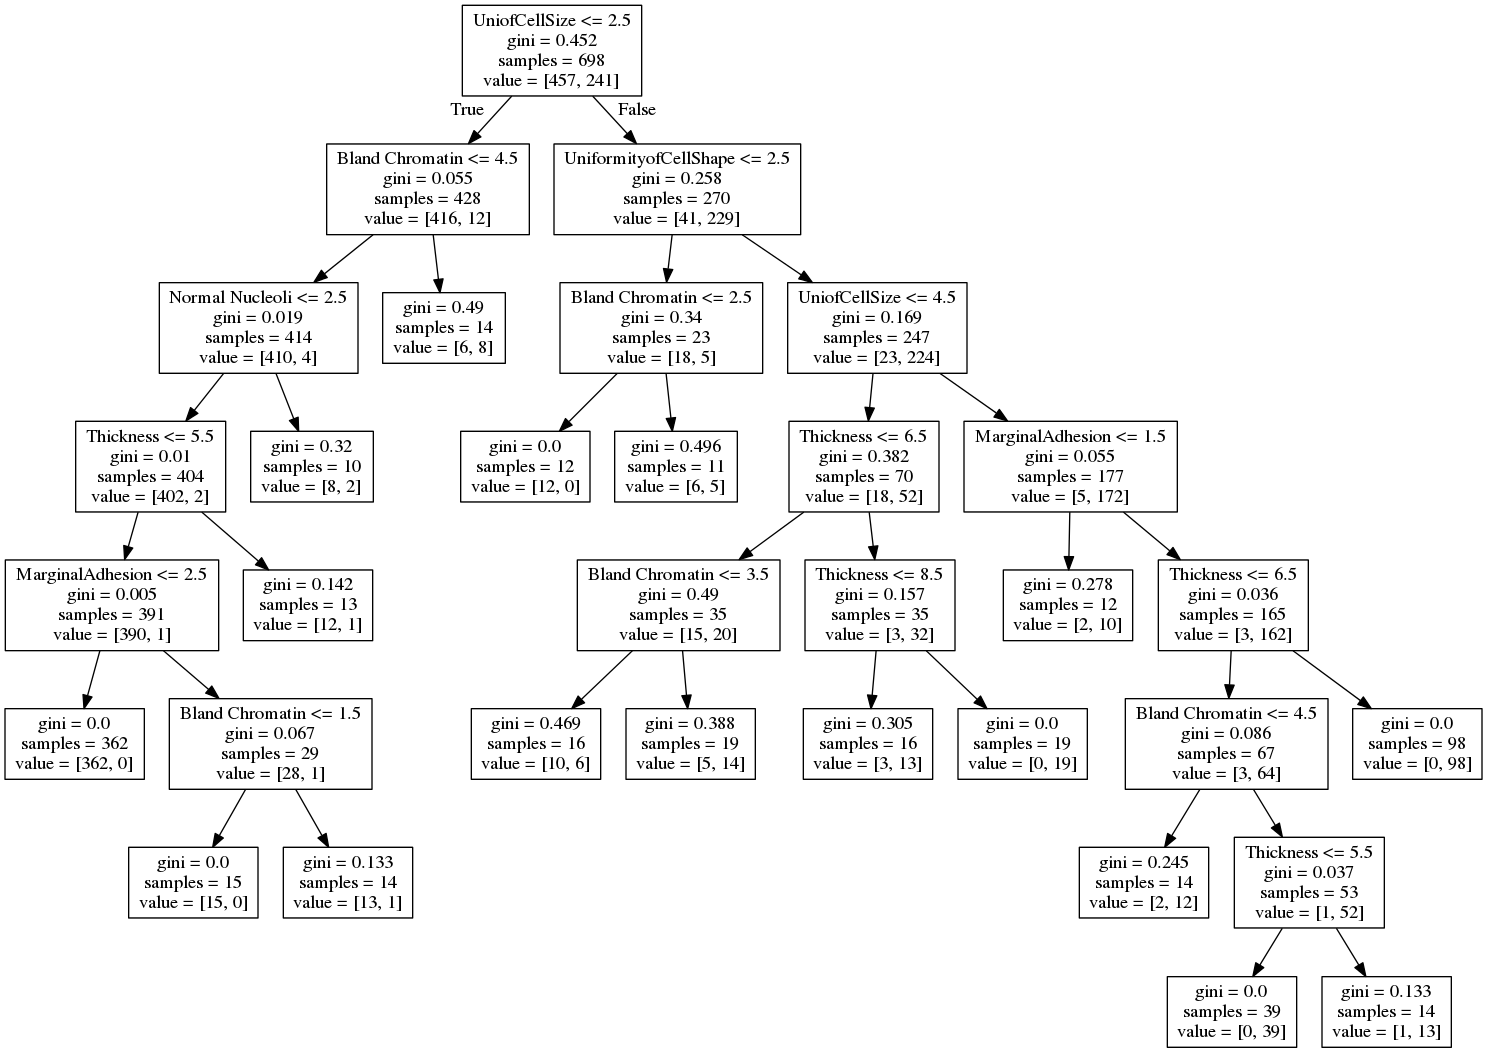

In [91]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features_list) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
### Falta: fazer k-means, investigar 'BareNuclei', investigar quais features são mais importantes segundo a medicina.